# Машинное обучение, ВМК МГУ

## Практическое задание 1. Метод опорных векторов и аппроксимация ядер

### Общая информация
Дата выдачи: 23:59 MSK 05.03.2021

Мягкий дедлайн: 23:59MSK 19.03.2021 **(за каждый день просрочки снимается 1 балл)**

Жесткий дедлайн: 23:59MSK 26.03.2021

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — **10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
   * Ноутбук homework-practice-01-random-features-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as lsc
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey', ls=':')
plt.rc('font', family='serif', size=11)

### О задании

На занятиях мы подробно обсуждали метод опорных векторов (SVM). В базовой версии в нём нет чего-то особенного — мы всего лишь используем специальную функцию потерь, которая не требует устремлять отступы к бесконечности; ей достаточно, чтобы отступы были не меньше +1. Затем мы узнали, что SVM можно переписать в двойственном виде, который, позволяет заменить скалярные произведения объектов на ядра. Это будет соответствовать построению модели в новом пространстве более высокой размерности, координаты которого представляют собой нелинейные модификации исходных признаков.

Ядровой SVM, к сожалению, довольно затратен по памяти (нужно хранить матрицу Грама размера $d \times d$) и по времени (нужно решать задачу условной оптимизации с квадратичной функцией, а это не очень быстро). Мы обсуждали, что есть способы посчитать новые признаки $\tilde \varphi(x)$ на основе исходных так, что скалярные произведения этих новых $\langle \tilde \varphi(x), \tilde \varphi(z) \rangle$ приближают ядро $K(x, z)$.

Мы будем исследовать аппроксимации методом Random Fourier Features (RFF, также в литературе встречается название Random Kitchen Sinks) для гауссовых ядер. Будем использовать формулы, которые немного отличаются от того, что было на лекциях (мы добавим сдвиги внутрь тригонометрических функций и будем использовать только косинусы, потому что с нужным сдвигом косинус превратится в синус):
$$\tilde \varphi(x) = (
\cos (w_1^T x + b_1),
\dots,
\cos (w_n^T x + b_n)
),$$
где $w_j \sim \mathcal{N}(0, 1/\sigma^2)$, $b_j \sim U[-\pi, \pi]$.

На новых признаках $\tilde \varphi(x)$ мы будем строить любую линейную модель.

Можно считать, что это некоторая новая парадигма построения сложных моделей. Можно направленно искать сложные нелинейные закономерности в данных с помощью градиентного бустинга или нейронных сетей, а можно просто нагенерировать большое количество случайных нелинейных признаков и надеяться, что быстрая и простая модель (то есть линейная) сможет показать на них хорошее качество. В этом задании мы изучим, насколько работоспособна такая идея.

### Алгоритм

Вам потребуется реализовать следующий алгоритм:
1. Понизить размерность выборки до new_dim с помощью метода главных компонент.

2. Для полученной выборки оценить гиперпараметр $\sigma^2$ с помощью эвристики (рекомендуем считать медиану не по всем парам объектов, а по случайному подмножеству из где-то миллиона пар объектов): $$\sigma^2 = \text{median}_{i, j = 1, \dots, \ell, i \neq j} \left\{\sum_{k = 1}^{d} (x_{ik} - x_{jk})^2 \right\}$$
**Замечание:** обратите внимание на  $i \neq j$, без этого оценка медианы может быть смещена, а также без этого будут сниматься баллы.

3. Сгенерировать n_features наборов весов $w_j$ и сдвигов $b_j$.

4. Сформировать n_features новых признаков по формулам, приведённым выше.

5. Обучить линейную модель (логистическую регрессию или SVM) на новых признаках.

6. Повторить преобразования (PCA, формирование новых признаков) к тестовой выборке и применить модель.

Тестировать алгоритм мы будем на данных Fashion MNIST. Ниже код для их загрузки и подготовки.

In [2]:
# Attention! Кажется, под python3.9 импортнуть керас будет трудно (стабильный тензорфлоу requires Python 3.5–3.8, pip and venv >= 19.0)
import keras
from keras.datasets import fashion_mnist
(x_train_pics, y_train), (x_test_pics, y_test) = fashion_mnist.load_data()
x_train = x_train_pics.reshape(x_train_pics.shape[0], -1)
x_test = x_test_pics.reshape(x_test_pics.shape[0], -1)

4423680/4422102 [==============================] - 0s 0us/step


**ВАЖНОЕ ЗАМЕЧАНИЕ:**

Датасет по умолчанию хранится в типе 'uint8', вследствие чего при ручном подсчете дисперсии переменные переполняются и вы получаете неадекватные результаты. Бороться с этим можно преобразованием исходных данных к типу 'float'. Еще один хороший вариант &ndash; использовать специализированные функции из библиотек numpy / scipy и, в частности, **scipy.spatial.distance_matrix**.

Ниже приводим подтверждающий пример.

In [3]:
import numpy as np

indices = np.random.choice(x_train.shape[0], size=2000)
print(np.median(np.sum((x_train[indices[:1000]].astype(float) - x_train[indices[1000:]]).astype(float) ** 2, axis=1)))

print(np.median(np.sum((x_train[indices[:1000]] - x_train[indices[1000:]]) ** 2, axis=1)))

8844153.0
54376.5


__Задание 1. (5 баллов)__

**А) (4 балла)** Реализуйте алгоритм, описанный выше. Можете воспользоваться шаблоном класса ниже или написать свой интерфейс.

Ваша реализация должна поддерживать следующие опции:
1. Возможность задавать значения параметров new_dim (по умолчанию 50) и n_features (по умолчанию 1000).
2. Возможность включать или выключать предварительное понижение размерности с помощью метода главных компонент.
3. Возможность выбирать тип линейной модели (логистическая регрессия или SVM с линейным ядром).


**Важно! За несоответствия будут сниматься баллы:**
* Так как мы работаем с линейными моделями, вам необходимо делать нормализацию данных.
* Оценка гиперпраметра распределения и построение нового датасета должны быть без питоновских циклов (можно все запрограммировать векторно, используя numpy)

**Б) (1 балл)** Протестируйте на данных Fashion MNIST, сформированных кодом выше. Если на тесте у вас получилась доля верных ответов **не ниже 0.84 с параметрами по умолчанию**, то вы всё сделали правильно.

**Подсказка**
* Использование метода без PCA и без нормализации признаков перед генерацией весов может дать неожиданные результаты. Сами подумайте, почему так может происходить :)

<font color=blue>Модификации шаблона:</font>
* <font color=blue>В инициализацию пайплайна добавлены параметры.</font>
    * <font color=blue>`normalize`, регулирующий нормализацию признаков до или в отсутствие PCA (после применении PCA признаки всегда нормализуются)</font>
    * <font color=blue>`seed` для генерации весов и смещений в RFF, а также инициализации солверов. </font>
    * <font color=blue>`clf_kwargs` для аргументов, передаваемых классификатору при инициализации.</font>
* <font color=blue>Из инициализации убран `use_PCA` (его функцию берет на себя `new_dim`).</font>
* <font color=blue>Последовательность преобразований реализована с помощью sklearn'овского пайплайна. Можно было бы обойтись без обертки-класса вообще, если бы не требовалось измерение времени отдельных шагов.</font>

<font color=blue>Комментарии к предобработке:</font>
* <font color=blue>По умолчанию нормализацию <b>перед PCA</b> не проводим, так как наши данные уже в единой шкале, sklearn перед нахождением SVD сам центрирует признаки. Нормализация <b>после PCA</b> обеспечивается за счет `whitening=False`.</font>
* <font color=blue>Для оценки $\sigma$ возьмем подвыборку из не более чем 2000 объектов (это даст чуть меньше 2 млн пар). Попарные расстояния сэмпла удобнее считать с помощью `scipy.spatial.distance.pdist`. Заметим, что мы работаем со <b>стандартным отклонением</b>, а не дисперсией.</font>

In [4]:
from time import time
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from scipy.spatial.distance import pdist

class RFFPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=1000, normalize=False, new_dim=50,
                 seed=None, classifier='logreg', **clf_kwargs):
        """
        Implements pipeline, which consists of PCA decomposition,
        Random Fourier Features approximation and linear classification model.
        
        n_features, int: amount of synthetic random features generated
                         with RFF approximation.
        normalize, bool: whether to normalize data before all steps.
        new_dim, int: PCA output size.
                      Set `None` to exclude PCA from preprocessing.
        seed, int: used to initialize random generator.
        classifier, string: either 'svm' or 'logreg', a linear classification model
                            to use on top of pipeline.  
        """
        self.n_features = n_features
        self.new_dim = new_dim
        self.normalize = normalize
        self.seed = seed
        self.classifier = classifier
        self.steps = [None]
        if normalize:
            self.steps.append(StandardScaler())
        if new_dim is not None:
            self.steps.append(PCA(n_components=new_dim,
                                  whiten=True,
                                  random_state=seed))
        if 'random_state' not in clf_kwargs:
            clf_kwargs['random_state'] = seed
        if classifier == 'logreg':
            self.clf_ = LogisticRegression(**clf_kwargs)
        elif classifier == 'svm':
            self.clf_ = LinearSVC(**clf_kwargs)
        self.rng = np.random.default_rng(seed=seed)
        self.time_fit_full = None
        self.time_fit_clf = None
        self.pipe = make_pipeline(*self.steps)
    
    def _set_W_b(self, X):
        """
        Generate weights and biases for RFF.
        """
        sample = self.rng.choice(X.shape[0], min(2000, X.shape[0]), replace=False)
        std = 1 / np.median(pdist(X[sample]))
        self.weights = self.rng.normal(0, std, size=(X.shape[1], self.n_features))
        self.biases = self.rng.uniform(-np.pi, np.pi, size=self.n_features)
    
    def fit(self, X, y):
        """
        Fit all parts of algorithm (normalization), (PCA), RFF 
        and classification to training set.
        """
        self.time_fit_full = -time()
        X_reduced = self.pipe.fit_transform(X)
        self._set_W_b(X_reduced)
        RFF = FunctionTransformer(lambda x: np.cos(x @ self.weights + self.biases))
        X_rff = RFF.transform(X_reduced)
        self.steps.append(RFF)
        self.time_fit_clf = -time()
        self.clf_.fit(X_rff, y)
        self.steps.append(self.clf_)
        self.time_fit_clf += time()
        self.time_fit_full += time()
        self.pipe = make_pipeline(*self.steps)
        return self

    def predict_proba(self, X):
        """
        Probability estimates (only if classifier is 'logreg').
        """
        return self.pipe.predict_proba(X)
        
    def decision_function(self, X):
        """
        Predict confidence scores for samples.
        """
        return self.pipe.decision_function(X)        
        
    def predict(self, X):
        """
        Apply pipeline to obtain discrete predictions for input data.
        """
        return self.pipe.predict(X)


<font color=blue>Протестируем метод на Fashion MNIST.</font>

In [5]:
seed = 0

def check_implementation():
    rff_pipeline = RFFPipeline(seed=seed)
    rff_pipeline.fit(x_train, y_train)
    print(f'Fit time (full): {rff_pipeline.time_fit_full:.2f} s')
    print(f'Fit time (classifier): {rff_pipeline.time_fit_clf:.2f} s')
    print(f'Train accuracy: {(rff_pipeline.predict(x_train) == y_train).mean():.5f}')
    test_acc = (rff_pipeline.predict(x_test) == y_test).mean()
    print(f'Test accuracy: {test_acc}')
    assert test_acc > 0.84

In [6]:
check_implementation()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fit time (full): 262.95 s
Fit time (classifier): 149.11 s
Train accuracy: 0.88782
Test accuracy: 0.8627


In [7]:
check_implementation()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fit time (full): 263.17 s
Fit time (classifier): 148.73 s
Train accuracy: 0.88782
Test accuracy: 0.8627


<font color=blue>Запуск произведен дважды, чтобы проверить корректность инициализации BitGenerator'а. Несмотря на ворнинг, предупреждающий, что солвер не успел сойтись за дефолтное число итераций, модель достигла приемлемого качества.</font>

__Задание 2. (3 балла)__

_Сравните следующие подходы: **(2.5 балла)**_

* Подход со случайными признаками vs обучение линейного SVM на исходных признаках.
* Подход со случайными признаками vs обучение ядрового SVM на исходных признаках.
* Подход со случайными признаками vs вариант, в котором вы понижаете размерность с помощью PCA и обучаете градиентный бустинг. Используйте одну из реализаций CatBoost/LightGBM/XGBoost
 * Не забудьте в этом случае подобрать число деревьев и длину шага.

_Сделайте выводы: **(0.5 баллов)**_
* Насколько идея со случайными признаками работает?
* Сравните как с точки зрения качества, так и с точки зрения скорости обучения и применения.

**Важные замечания**
* Подход по случайными признаками тестируйте в двух вариантах линейной модели. То есть у вас должно получиться всего 6 пар сравнений.
* В подходе со случайными признаками в этом задании можно оставиь все параметры, кроме типа модели, по умолчанию.
---
* Ядровой SVM может очень долго обучаться, поэтому можно делать любые разумные вещи для ускорения: брать подмножество объектов из обучающей выборки, например.
* Если вы решили брать подвыборку для какого-то сравнения, то следите за тем, чтобы оба метода обучались на **одинаковом датасете**. Например, сравнивать подход со случайными признаками, обучая его на всем датасете, против ядрового SVM на подвыборке -- некорректно. Тестирование так же должно происходить на одинаковом датасете.
* Можно в начале этой секции выделить подвыборку и использовать ее для всех экспериментов, если вам это удобно. Необходимо оставить в таком случае хотя бы 10000 объектов. **За меньшее число будут сниматься баллы**
---
* При сравнении по времени не забывайте смотреть, во сколько потоков реализован алгоритм. Например, сравнивать алгоритм, с параметром n_jobs=-1 (задействовать все возможные потоки) с однопоточным алгоритмом по времени будет некорректно
* Замеряйте время не только обучения, но и обучения + препроцессинга, если он есть (считайте, что формирование признаков в подходе со случайными признаками входит в понятие алгоритма). Так вы сможете более точно проанализировать временные характеристики подходов. 
---
* Переберите хотя бы 10 различных значений количества деревьев (в разумных пределах и с разумным шагом), хотя бы 5 значений параметра learning rate (по логарифмической шкале). Если не знаете, в каких пределах пребирать, то можно найти материалы по соответствующим градиентным бустингам с разбором того, как обычно параметры перебирают.
* Перед использованием линейного подхода необходимо нормализовывать признаки (это обычная практика при применении линейных методов, как вы знаете)
* Отображать результаты лучше всего будет в виде таблички (pandas DataFrame например), где отображены результаты как  качеств всех алгоритмов, так и времена работы. Можно использовать графическое отображение через bar_plot. Можно также текстом.
---
* Здесь и далее нигде не должно быть сильных просадок по качеству. То есть, если вы получили где-то качество 0.2/0.3/0.4 итд --- это повод задуматься, что где-то у вас есть бага. Во всех экспериментах мы ожидаем качество на тесте не ниже 0.75. **За меньшее качество будут сниматься баллы**

<font color=blue>Далее в экспериментах не будем распараллеливать модели (чтобы однородно оценить время везде), и даже пока оставим выборки полными.</font>

In [8]:
from sklearn.model_selection import train_test_split

<font color=blue>Измерения времени будут подразумевать три оценки для каждой модели:</font>
1. <font color=blue>Обучение классификатора.</font>
2. <font color=blue>Полное время обучения (время на предобработку обучения, в ходе которой, например, фитится PCA + обучение классификатора).</font>
3. <font color=blue>Полное время предсказания (в которое входит и трансформация теста, и предикт). Здесь мы не разделяем, поскольку оба этапа производятся быстро.</font>

<font color=blue><b>Модели, используемые в экспериментах</b></font>

<font color=blue>Внутри RFF-пайплайна:</font>
* <font color=blue>Логистическая регрессия с оптимизатором `SAGA`</font>
* <font color=blue>Метод опорных векторов (линейный) в реализации `liblinear`</font>

<font color=blue>Вне RFF:</font>
* <font color=blue>Метод опорных векторов (линейный) в реализации `liblinear`</font>
* <font color=blue>Метод опорных векторов (ядровой) в реализации `libsvm`, RBF-ядро</font>
* <font color=blue>Градиентный бустинг в реализации PCA + `LightGBM`</font>


In [9]:
model_names = ['PCA + RFF + LogReg', 'PCA + RFF + Linear SVM',
               'Linear SVM', 'Kernel SVM (RBF)', 'PCA + GBM']
exps = ['test accuracy', 'train accuracy',
        'fit time (full), s', 'fit time (clf), s', 'predict time, s']

results = pd.DataFrame(index=exps, columns=model_names, dtype=float)
results

,PCA + RFF + LogReg,PCA + RFF + Linear SVM,Linear SVM,Kernel SVM (RBF),PCA + GBM
test accuracy,NaN,NaN,NaN,NaN,NaN
train accuracy,NaN,NaN,NaN,NaN,NaN
"fit time (full), s",NaN,NaN,NaN,NaN,NaN
"fit time (clf), s",NaN,NaN,NaN,NaN,NaN
"predict time, s",NaN,NaN,NaN,NaN,NaN


## <font color=blue>RFF</font>

In [10]:
inner_names = ['logreg', 'svm']
outer_names = ['PCA + RFF + LogReg', 'PCA + RFF + Linear SVM']
logreg_kw = {'solver': 'saga', 'tol': 0.05}
lin_svm_kw = {'dual': False}
clf_kwargs = [logreg_kw, lin_svm_kw]

for inner_name, outer_name, kw in zip(inner_names, outer_names, clf_kwargs):
    model = RFFPipeline(classifier=inner_name, seed=seed, **kw)
    model.fit(x_train, y_train)
    pred_time = -time()
    test_acc = (model.predict(x_test) == y_test).mean()
    pred_time += time()
    results[outer_name] = [
        test_acc,
        (model.predict(x_train) == y_train).mean(),
        model.time_fit_full,
        model.time_fit_clf,
        pred_time
    ]

## <font color=blue>Линейный SVM, ядровой SVM</font>

In [11]:
from sklearn.svm import LinearSVC, SVC

time_train_prep = -time()
x_train_scaled = x_train / 255
time_train_prep += time()
time_test_prep = -time()
x_test_scaled = x_test / 255
time_test_prep += time()

models = [LinearSVC(random_state=seed, **lin_svm_kw),
          SVC(random_state=seed, kernel='rbf',
              cache_size=1024)]
outer_names = ['Linear SVM', 'Kernel SVM (RBF)']

for model, outer_name in zip(models, outer_names):
    time_fit_clf = -time()
    model.fit(x_train_scaled, y_train)
    time_fit_clf += time()
    pred_time = -time()
    test_acc = (model.predict(x_test_scaled) == y_test).mean()
    pred_time += time()
    results[outer_name] = [
        test_acc,
        (model.predict(x_train_scaled) == y_train).mean(),
        time_fit_clf + time_train_prep,
        time_fit_clf,
        pred_time + time_test_prep
    ]

## <font color=blue>Градиентный бустинг</font>

<font color=blue>Для подбора параметров понадобится отложенная выборка.</font>

In [12]:
x_train_lgb, x_val_lgb, y_train_lgb, y_val_lgb = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=seed)

time_train_prep = -time()
pca = PCA(n_components=30, random_state=seed)
x_train_lgb_pca = pca.fit_transform(x_train_lgb)
time_train_prep += time()
time_test_prep = -time()
x_test_lgb_pca = pca.transform(x_test)
time_test_prep += time()
x_val_lgb_pca = pca.transform(x_val_lgb)

In [13]:
from tqdm.notebook import tqdm
from lightgbm import LGBMClassifier

n_trees = (np.arange(10) + 1) * 20  # 20, 40, ..., 200
learning_rates = np.logspace(-4, 0, 5)
val_accs = []

for learning_rate in tqdm(learning_rates):
    print(f'learning_rate = {learning_rate}')
    for n_estimators in n_trees:
        lgb = LGBMClassifier(learning_rate=learning_rate,
                             n_estimators=n_estimators,
                             random_state=seed)
        lgb.fit(x_train_lgb_pca, y_train_lgb)
        val_acc = (lgb.predict(x_val_lgb_pca) == y_val_lgb).mean()
        val_accs.append((val_acc, learning_rate, n_estimators))
        print(f'    {n_estimators} trees, val accuracy: {val_acc}')

  0%|          | 0/5 [00:00<?, ?it/s]

learning_rate = 0.0001
    20 trees, val accuracy: 0.7836666666666666
    40 trees, val accuracy: 0.7838333333333334
    60 trees, val accuracy: 0.7843333333333333
    80 trees, val accuracy: 0.783
    100 trees, val accuracy: 0.7828333333333334
    120 trees, val accuracy: 0.7823333333333333
    140 trees, val accuracy: 0.782
    160 trees, val accuracy: 0.7841666666666667
    180 trees, val accuracy: 0.785
    200 trees, val accuracy: 0.7853333333333333
learning_rate = 0.001
    20 trees, val accuracy: 0.7856666666666666
    40 trees, val accuracy: 0.7905
    60 trees, val accuracy: 0.7943333333333333
    80 trees, val accuracy: 0.799
    100 trees, val accuracy: 0.7983333333333333
    120 trees, val accuracy: 0.8005
    140 trees, val accuracy: 0.8016666666666666
    160 trees, val accuracy: 0.8031666666666667
    180 trees, val accuracy: 0.8043333333333333
    200 trees, val accuracy: 0.8061666666666667
learning_rate = 0.01
    20 trees, val accuracy: 0.8076666666666666
    40 tree

In [14]:
best_lgb = max(val_accs)
print(f'Best accuracy on validation: {best_lgb[0]}')
print(f'with parameters learning_rate={best_lgb[1]}, n_estimators={best_lgb[2]}')

Best accuracy on validation: 0.8716666666666667
with parameters learning_rate=0.1, n_estimators=180


In [15]:
model = LGBMClassifier(learning_rate=best_lgb[1],
                       n_estimators=best_lgb[2],
                       random_state=seed,
                       n_jobs=1)
time_fit_clf = -time()
model.fit(x_train_lgb_pca, y_train_lgb)
time_fit_clf += time()
pred_time = -time()
test_acc = (model.predict(x_test_lgb_pca) == y_test).mean()
pred_time += time()
results['PCA + GBM'] = [
    test_acc,
    (model.predict(x_train_lgb_pca) == y_train_lgb).mean(),
    time_fit_clf + time_train_prep,
    time_fit_clf,
    pred_time + time_test_prep
]


## <font color=blue>Результаты</font>

<font color=blue>Выведем результаты экспериментов (светлее фон $\implies$ лучше):</font>

In [16]:
cmap_to_lime = lsc.from_list('to_lime', ['#009900', '#00ff00'])
cmap_to_cyan = lsc.from_list('to_cyan', ['#009999', '#00ffff'])
acc_subset = (results.index[:2], results.columns)
time_subset = (results.index[2:], results.columns)

results.style.background_gradient(cmap=cmap_to_lime,
                                  axis=1, subset=acc_subset) \
             .background_gradient(cmap=cmap_to_cyan.reversed(),
                                  axis=1, subset=time_subset)\
             .format("{:.3f}")

,PCA + RFF + LogReg,PCA + RFF + Linear SVM,Linear SVM,Kernel SVM (RBF),PCA + GBM
test accuracy,0.869,0.865,0.840,0.883,0.867
train accuracy,0.900,0.910,0.874,0.913,0.991
"fit time (full), s",140.562,349.283,112.863,319.278,91.374
"fit time (clf), s",26.539,236.476,112.740,319.155,26.468
"predict time, s",0.883,0.796,0.072,171.699,1.998


<font color=blue>Итак, результаты экспериментов проведены в таблице. Прокомментируем некоторые моменты.</font>

* <font color=blue><b>PCA + RFF + LogReg</b> vs <b>PCA + RFF + Linear SVM</b><br>
Обе линейных модели над случайными признаками дают похожее качество, но SVM сильнее переобучается и в результате работает лучше на трейне и хуже на тесте. Логистическая существенно быстрее — почему? В том числе прочего, благодаря солверу: критерий останова выставлен не очень строгим (`tolerance=0.05`). Во SVM же порог строже, но это не помогло модели достичь лучшего качества.
</font>

* <font color=blue><b>PCA + RFF + LogReg</b> vs <b>Linear SVM</b><br>
Линейный SVM дает наихудшее качество вообще по результатам всех экспериментов, а значит, цель построить нелинейный алгоритм для данной выборки оправдана. Более долгое время работы самого классификатора связано с тем, что мы позволили линейному SVM над исходными признаками лучше сойтись. Также Linear SVM очень быстро делает предсказания. 
</font>

* <font color=blue><b>PCA + RFF + Linear SVM</b> vs <b>Linear SVM</b><br>
SVM над RFF по результатам измерений все еще лучше линейного SVM над исходными признаками с точки зрения качества, но обучается и делает предсказания медленнее. Как видим, что переход в новое признаковое пространство дает лучшую линейную разделимость.
</font>

* <font color=blue><b>PCA + RFF + LogReg</b> vs <b>Kernel SVM (RBF)</b><br>
У ядрового SVM лучшее качество на тесте вообще по результатам всех экспериментов. В сравнении с логистической регрессией над RFF, SVM с RBF ядром гораздо обучается и непозволительно долго строит предсказания. Последнее связано с тем, что RBF-ядро дорого вычислять и на этапе предсказаний.
</font>

* <font color=blue><b>PCA + RFF + Linear SVM</b> vs <b>Kernel SVM (RBF)</b><br>
По качеству SVM с RBF по-прежнему лучше, но по времени результаты отличаются от предыдущей пары. Мы видим, что полное время обучения не очень отличается, но сама модель быстрее учится с RFF. В целом, это может быть не очень честным измерением, ведь непосредственно вычисление RBF-ядра здесь не отделяется от обучения классификатора.
</font>

* <font color=blue><b>PCA + RFF + LogReg</b> vs <b>PCA + GBM</b><br>
Бустинг на тесте работает чуть-чуть хуже, чем логистическая регрессия над RFF, но сильнее всего переобучается на трейн. Причем по времени обучения алгоритмы близки, но предсказания бустинг делает дольше.
</font>

* <font color=blue><b>PCA + RFF + Linear SVM</b> vs <b>PCA + GBM</b><br>
А здесь бустинг работает чуть лучше подхода с RFF, но выигрывает по времени обучения.
</font>

<font color=blue><b>Таким образом</b>, у каждого из подходов есть сильные и слабые стороны. Чисто линейная модель выигрывает исключительно по времени предсказаний, но проигрывает по всем остальным пунктам. Ядерный SVM лучше всего работает на тесте, но эти предсказания делаются слишком долго. Бустинг быстро обучается (после PCA), но по качеству занимает средние позиции. Идея со случайными признаками работает! В частности с линейной регрессией удается достичь высокого качества за приемлемое время.</font>

__Задание 3. (2 балла)__

Проведите эксперименты **(1.5 балла)**, после которых вы сможете ответить на следующие вопросы **(0.5 балла)**:
1. Помогает ли предварительное понижение размерности с помощью PCA? 
2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?
3. Важно ли, какую модель обучать — логистическую регрессию или SVM?

**Замечания:**
* В п.2 необходимо перебрать хотя бы 30 значений признаков по разумной сетке, затрагивающей значение в 3000 признаков (или максимальное из того, что позволяет ваш компьтер за разумное время). **За меньшее число признаков и меньшее максимальное значение будут сниматься баллы**
* В п.2 используйте логистическую регрессию
* В п.2 отобразите качества (accuracy_score) на обучении и на тесте в виде графиков на одном полотне. **За отсутствие будут сниматься баллы**
* Везде делайте замеры по времени и результаты включайте в выводы. **За отсутствие будут сниматься баллы**

### <font color=blue>1. Помогает ли предварительное понижение размерности с помощью PCA? </font>

In [17]:
new_dims = [10, 50, 100, 150, 200, None]

results = pd.DataFrame(index=exps, columns=new_dims)

for new_dim in tqdm(new_dims):
    model = RFFPipeline(new_dim=new_dim, classifier='logreg',
                        seed=seed, **logreg_kw)
    model.fit(x_train, y_train)
    pred_time = -time()
    test_acc = (model.predict(x_test) == y_test).mean()
    pred_time += time()
    results[new_dim] = [
        test_acc,
        (model.predict(x_train) == y_train).mean(),
        model.time_fit_full,
        model.time_fit_clf,
        pred_time
    ]

  0%|          | 0/6 [00:00<?, ?it/s]

<font color=blue>В отсутствие PCA мы попробуем строить RFF как над сырыми, так и нормализованными данными.</font>

In [18]:
model = RFFPipeline(new_dim=None, normalize=True, classifier='logreg',
                    seed=seed, **logreg_kw)
model.fit(x_train, y_train)
pred_time = -time()
test_acc = (model.predict(x_test) == y_test).mean()
pred_time += time()
results['normalized'] = [
    test_acc,
    (model.predict(x_train) == y_train).mean(),
    model.time_fit_full,
    model.time_fit_clf,
    pred_time
]

In [19]:
import itertools
def cart_prod(*args):
    return list(itertools.product(*args))

results.columns = results.columns.fillna('nothing')

results.columns = pd.MultiIndex.from_tuples(
    cart_prod(['n_features'], results.columns[:5]) +
    cart_prod(['[no PCA] preprocessing'], results.columns[5:])
)

acc_subset = (results.index[:2], results.columns)
time_subset = (results.index[2:], results.columns)

results.style.background_gradient(cmap=cmap_to_lime,
                                  axis=1, subset=acc_subset) \
             .background_gradient(cmap=cmap_to_cyan.reversed(),
                                  axis=1, subset=time_subset)\
             .format("{:.4f}")

<font color=blue>Результаты получились достаточно интересные. Во-первых, без PCA алгоритм работает лучше на ненормализованных данных. Это может быть связано с тем, что они уже в одной шкале. Во-вторых, при варьировании числа компонент наблюдается локальный оптимум: качество на тесте при `n_features=50` очень близко к качеству без предобработки (в данном эксперимент незначительно ниже). Что касается времени, то при PCA много времени уходит именно на поиск разложения, зато обучение классификатора и предсказания достаточно быстрые. Без предобработки уходит много времени на генерацию RFF и его применение из-за большей размерности.</font>

<font color=blue>Таким образом, предварительное снижение размерности помогает, если мы хотим быстрее работать с RFF, качество (при разумном числе компонент) получается таким же приемлемым. Но PCA мешает, если мы дорожим полным временем обучения, поскольку PCA дорог сам по себе.</font>

### <font color=blue>2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?</font>

<font color=blue>Заметим, что для ускорения данного эксперимента можно понизить размерность один раз, а потом просто варьировать `n_features`. Далее оставим именно такую выборку.</font>

In [20]:
%%time
pca = PCA(n_components=50, whiten=True, random_state=seed)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

CPU times: user 1min 57s, sys: 4.92 s, total: 2min 2s
Wall time: 1min 55s


In [21]:
# 150, 300, ..., 4500
n_features_vals = (np.arange(30) + 1) * 150

test_accs, train_accs = [], []
clf_fit_times, full_fit_times = [], []

for n_features in tqdm(n_features_vals):
    model = RFFPipeline(new_dim=None, classifier='logreg',
                        n_features=n_features,
                        seed=seed, **logreg_kw)
    model.fit(x_train_pca, y_train)
    test_accs += [(model.predict(x_test_pca) == y_test).mean()]
    train_accs += [(model.predict(x_train_pca) == y_train).mean()]
    full_fit_times += [model.time_fit_full]
    clf_fit_times += [model.time_fit_clf]

  0%|          | 0/30 [00:00<?, ?it/s]

<font color=blue>Сначала рассмотрим время работы (помним, что PCA мы сделали предварительно):</font>

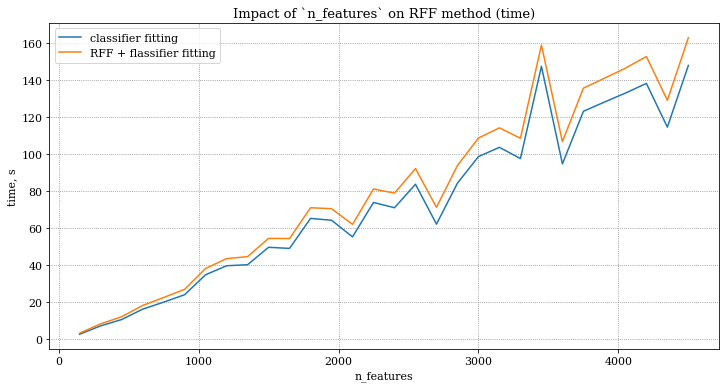

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Impact of `n_features` on RFF method (time)')
plt.plot(n_features_vals, clf_fit_times, label='classifier fitting')
plt.plot(n_features_vals, full_fit_times, label='RFF + flassifier fitting')
plt.legend()
plt.xlabel('n_features')
_ = plt.ylabel('time, s')

<font color=blue>Время ожидаемо растет.</font>

<font color=blue>Теперь рассмотрим, что происходит с качеством на трейне и тесте:</font>

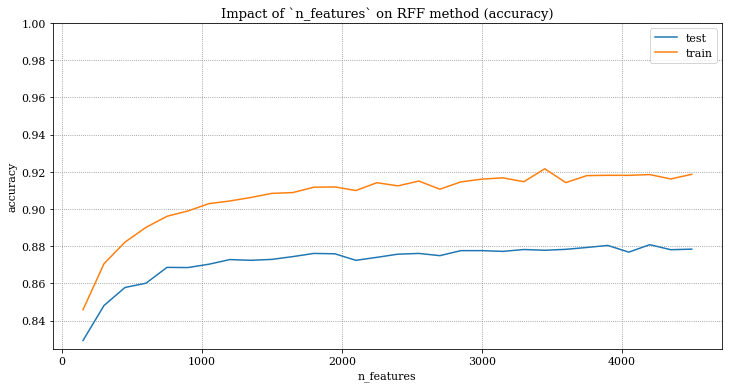

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Impact of `n_features` on RFF method (accuracy)')
plt.plot(n_features_vals, test_accs, label='test')
plt.plot(n_features_vals, train_accs, label='train')
plt.legend()
plt.ylim((None, 1))
plt.xlabel('n_features')
_ = plt.ylabel('accuracy')

<font color=blue>Можно заметить, что качество постепенно увеличивается с ростом `n_features`, а затем выходит на асимптоту, если не учитывать разброс, связанный с генерацией случайных признаков. Время же растет, не считая выбросов, линейно.</font>

### <font color=blue> 3. Важно ли, какую модель обучать — логистическую регрессию или SVM?</font>

<font color=blue>У нас уже был проведен эксперимент в предыдущем задании, в котором мы увидели, что логистическая регрессия может работать быстрее и качественнее над признаками RFF, при том, что у логистической регрессии был слабее критерий останова. Попробуем обогнать логистическую регрессию, варьируя параметр регуляризации у SVM.</font>

In [24]:
results = pd.DataFrame(index=exps)
model = RFFPipeline(new_dim=None, normalize=True, classifier='logreg',
                    seed=seed, **logreg_kw)
model.fit(x_train_pca, y_train)
pred_time = -time()
test_acc = (model.predict(x_test_pca) == y_test).mean()
pred_time += time()

results['LogReg'] = [
    test_acc,
    (model.predict(x_train_pca) == y_train).mean(),
    model.time_fit_full,
    model.time_fit_clf,
    pred_time
]

In [25]:
Cs = np.logspace(-4, 0, 5)

for C in tqdm(Cs):
    model = RFFPipeline(new_dim=new_dim, classifier='svm',
                        dual=False, C=C, seed=seed)
    model.fit(x_train_pca, y_train)
    pred_time = -time()
    test_acc = (model.predict(x_test_pca) == y_test).mean()
    pred_time += time()
    results[f'SVM, C={C}'] = [
        test_acc,
        (model.predict(x_train_pca) == y_train).mean(),
        model.time_fit_full,
        model.time_fit_clf,
        pred_time
    ]

  0%|          | 0/5 [00:00<?, ?it/s]

In [26]:
acc_subset = (results.index[:2], results.columns)
time_subset = (results.index[2:], results.columns)

results.style.background_gradient(cmap=cmap_to_lime,
                                  axis=1, subset=acc_subset) \
             .background_gradient(cmap=cmap_to_cyan.reversed(),
                                  axis=1, subset=time_subset)\
             .format("{:.4f}")

,LogReg,"SVM, C=0.0001","SVM, C=0.001","SVM, C=0.01","SVM, C=0.1","SVM, C=1.0"
test accuracy,0.8688,0.8361,0.8581,0.8680,0.8666,0.8645
train accuracy,0.8997,0.8491,0.8780,0.8966,0.9061,0.9101
"fit time (full), s",29.8096,65.6005,90.9396,121.4134,175.1773,245.9917
"fit time (clf), s",26.5232,62.3739,87.6474,118.1226,171.8807,242.7219
"predict time, s",0.6777,0.5861,0.6990,0.6059,0.6009,0.6064


<font color=blue>Как видим, с нужным параметром регуляризации (0.001) модель с SVM может работать тоже неплохо. Но тем не менее логрегрессию она не догнала в итоге по нашим измерениям, кроме разве что времени предсказаний. Таким образом, имеет значение сама линейная модель — то есть правильный подбор параметров и т.д. В нашем случае пока лучше логистическая регрессия.</font>

### Бонус

__Задание 4. (Максимум 2 балла)__

Многие алгоритмы машинного обучения работают лучше, если признаки данных некоррелированы. Оказывается, что для RFF существует модификация, позволяющая получать ортогональные случайные признаки (Orthogonal Random Features, ORF). Об этом методе можно прочитать в [статье](https://proceedings.neurips.cc/paper/2016/file/53adaf494dc89ef7196d73636eb2451b-Paper.pdf). Реализуйте класс для вычисления ORF по аналогии с основным заданием. Обратите внимание, что ваш класс должен уметь работать со случаем n_features > new_dim (в статье есть замечание на этот счет). Проведите эксперименты, сравнивающие RFF и ORF, сделайте выводы.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.
* Можно сравнивать качество двух методов на разном числе признаков, в таком случае очень полезным будет график зависимости качества от числа признаков

__Задание 5. (Максимум 2 балла)__

Поэкспериментируйте с функциями для вычисления новых случайных признаков. Не обязательно использовать косинус от скалярного произведения — можно брать знак от него, хэш и т.д. Придумайте побольше вариантов для генерации признаков и проверьте, не получается ли с их помощью добиваться более высокого качества. Также можете попробовать другой классификатор поверх случайных признаков, сравните результаты.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.

<font color=blue>Добавим новый параметр — функцию, применяющуюся после скалярных произведений.</font>

In [37]:
class RFFPipeline_v2(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=1000, normalize=False, new_dim=50,
                 seed=None, classifier='logreg', func=np.cos,
                 **clf_kwargs):
        """
        Implements pipeline, which consists of PCA decomposition,
        Random Fourier Features approximation and linear classification model.
        
        n_features, int: amount of synthetic random features generated
                         with RFF approximation.
        normalize, bool: whether to normalize data before all steps.
        new_dim, int: PCA output size.
                      Set `None` to exclude PCA from preprocessing.
        seed, int: used to initialize random generator.
        classifier, string: either 'svm' or 'logreg', a linear classification model
                            to use on top of pipeline.
        func: func to apply after inner product.
        **clf_kwargs: additional kwargs to classifier.
        """
        self.n_features = n_features
        self.new_dim = new_dim
        self.normalize = normalize
        self.seed = seed
        self.classifier = classifier
        self.func=func
        self.steps = [None]
        if normalize:
            self.steps.append(StandardScaler())
        if new_dim is not None:
            self.steps.append(PCA(n_components=new_dim,
                                  whiten=True,
                                  random_state=seed))
        if 'random_state' not in clf_kwargs:
            clf_kwargs['random_state'] = seed
        if classifier == 'logreg':
            self.clf_ = LogisticRegression(**clf_kwargs)
        elif classifier == 'svm':
            self.clf_ = LinearSVC(**clf_kwargs)
        self.rng = np.random.default_rng(seed=seed)
        self.time_fit_full = None
        self.time_fit_clf = None
        self.pipe = make_pipeline(*self.steps)
    
    def _set_W_b(self, X):
        """
        Generate weights and biases for RFF.
        """
        sample = self.rng.choice(X.shape[0], min(2000, X.shape[0]), replace=False)
        std = 1 / np.median(pdist(X[sample]))
        self.weights = self.rng.normal(0, std, size=(X.shape[1], self.n_features))
        self.biases = self.rng.uniform(-np.pi, np.pi, size=self.n_features)
    
    def fit(self, X, y):
        """
        Fit all parts of algorithm (normalization), (PCA), RFF 
        and classification to training set.
        """
        self.time_fit_full = -time()
        X_reduced = self.pipe.fit_transform(X)
        self._set_W_b(X_reduced)
        RFF = FunctionTransformer(lambda x: self.func(x @ self.weights + self.biases))
        X_rff = RFF.transform(X_reduced)
        self.steps.append(RFF)
        self.time_fit_clf = -time()
        self.clf_.fit(X_rff, y)
        self.steps.append(self.clf_)
        self.time_fit_clf += time()
        self.time_fit_full += time()
        self.pipe = make_pipeline(*self.steps)
        return self

    def predict_proba(self, X):
        """
        Probability estimates (only if classifier is 'logreg').
        """
        return self.pipe.predict_proba(X)
        
    def decision_function(self, X):
        """
        Predict confidence scores for samples.
        """
        return self.pipe.decision_function(X)        
        
    def predict(self, X):
        """
        Apply pipeline to obtain discrete predictions for input data.
        """
        return self.pipe.predict(X)

In [38]:
from scipy.special import expit

results = pd.DataFrame(index=exps)

funcs = [np.cos, np.sin, np.sign, expit, np.tanh,
         lambda x: np.exp(-x ** 2),
         lambda x: np.exp(-np.abs(x)),
         lambda x: (np.abs(x) < 1) * (1 - np.abs(x)),
         lambda x: (np.abs(x) < 1) * (1 - x ** 2)]

func_names = ['sin', 'cos', 'sign', 'sigmoid', 'tanh',
              r'$e^{-x^2}$',
              r'$e^{-|x|}$',
              r'$[|x|< 1]\cdot (1-|x|)$',
              r'$[|x|< 1]\cdot (1-x^2)$',
             ]

for name, func in tqdm(zip(func_names, funcs), total=len(funcs)):
    model = RFFPipeline_v2(new_dim=None, func=func,
                                   seed=seed, **logreg_kw)
    model.fit(x_train_pca, y_train)
    pred_time = -time()
    test_acc = (model.predict(x_test_pca) == y_test).mean()
    pred_time += time()
    results[name] = [
        test_acc,
        (model.predict(x_train_pca) == y_train).mean(),
        model.time_fit_full,
        model.time_fit_clf,
        pred_time
    ]

  0%|          | 0/9 [00:00<?, ?it/s]

In [39]:
acc_subset = (results.index[:2], results.columns)
time_subset = (results.index[2:], results.columns)

results.style.background_gradient(cmap=cmap_to_lime,
                                  axis=1, subset=acc_subset) \
             .background_gradient(cmap=cmap_to_cyan.reversed(),
                                  axis=1, subset=time_subset)\
             .format("{:.4f}")

,sin,cos,sign,sigmoid,tanh,$e^{-x^2}$,$e^{-|x|}$,$[|x|< 1]\cdot (1-|x|)$,$[|x|< 1]\cdot (1-x^2)$
test accuracy,0.8688,0.8678,0.8260,0.8422,0.8600,0.8642,0.8600,0.8487,0.8517
train accuracy,0.8997,0.8999,0.8589,0.8589,0.8828,0.8932,0.8847,0.8828,0.8865
"fit time (full), s",29.9940,29.9345,21.8673,39.4612,30.1726,26.2489,26.1135,22.1239,22.0663
"fit time (clf), s",26.6384,26.7363,20.0906,36.7429,26.7160,23.3178,23.2556,19.9756,19.9512
"predict time, s",0.6883,0.6721,0.4402,0.5993,0.7219,0.6228,0.6133,0.4977,0.4971


<font color=blue>Как видим, косинус работает лучше всего. Хотя другие функции тоже не плохи! Например, сигнум самый быстрый, а $e^{-x^2}$ дает неплохое качество. Последние две функции, взяты по типу треугольного и квадратического ядра.</font>